In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'Malgun Gothic'
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# EDA

## 1. 데이터 속성 및 기술통계량 확인

In [2]:
clinical_info_raw = pd.read_csv("NSCLC Radiomics Lung1.clinical-version3-Oct 2019.csv")
clinical_info = clinical_info_raw
clinical_info.head()

,PatientID,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Overall.Stage,Histology,gender,Survival.time,deadstatus.event
0,LUNG1-001,78.7515,2.0,3,0,IIIb,large cell,male,2165,1
1,LUNG1-002,83.8001,2.0,0,0,I,squamous cell carcinoma,male,155,1
2,LUNG1-003,68.1807,2.0,3,0,IIIb,large cell,male,256,1
3,LUNG1-004,70.8802,2.0,1,0,II,squamous cell carcinoma,male,141,1
4,LUNG1-005,80.4819,4.0,2,0,IIIb,squamous cell carcinoma,male,353,1


In [3]:
clinical_info.shape

(422, 10)

자료 수는 422개고 변수는 10개다.

In [4]:
clinical_info['PatientID'].unique().shape

(422,)

PatientID는 중복없이 422명의 환자로 확인되었다.

In [5]:
label = pd.read_csv("label.csv")
label.head()

,PatientID,Survival.time,Survival.time(month),recurrence
0,LUNG1-004,141,5.0,1
1,LUNG1-005,353,12.0,1
2,LUNG1-006,173,6.0,1
3,LUNG1-007,137,5.0,1
4,LUNG1-008,77,3.0,1


In [6]:
label.shape

(100, 4)

자료 수는 100개고 변수는 4개다.

In [7]:
clinical_info = clinical_info[clinical_info['PatientID'].isin(label['PatientID'].unique())]
clinical_info.head()

,PatientID,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Overall.Stage,Histology,gender,Survival.time,deadstatus.event
3,LUNG1-004,70.8802,2.0,1,0,II,squamous cell carcinoma,male,141,1
4,LUNG1-005,80.4819,4.0,2,0,IIIb,squamous cell carcinoma,male,353,1
5,LUNG1-006,73.8864,3.0,1,0,IIIa,squamous cell carcinoma,male,173,1
6,LUNG1-007,81.5288,2.0,2,0,IIIa,squamous cell carcinoma,male,137,1
7,LUNG1-008,71.6660,2.0,2,0,IIIa,adenocarcinoma,male,77,1


In [8]:
clinical_info.reset_index(drop=True, inplace=True)
clinical_info.head()

,PatientID,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Overall.Stage,Histology,gender,Survival.time,deadstatus.event
0,LUNG1-004,70.8802,2.0,1,0,II,squamous cell carcinoma,male,141,1
1,LUNG1-005,80.4819,4.0,2,0,IIIb,squamous cell carcinoma,male,353,1
2,LUNG1-006,73.8864,3.0,1,0,IIIa,squamous cell carcinoma,male,173,1
3,LUNG1-007,81.5288,2.0,2,0,IIIa,squamous cell carcinoma,male,137,1
4,LUNG1-008,71.6660,2.0,2,0,IIIa,adenocarcinoma,male,77,1


영상 데이터와 일치하는 PatientID만 분석할 예정이므로 기존 데이터를 가공했다.

In [9]:
# clinical_info['PatientID'] = clinical_info['PatientID'].apply(lambda x: x[-3:])
# clinical_info.head()

PatientID는 모두 LUNG1으로 시작하기 때문에 ID만 남긴다.

In [10]:
clinical_info.shape

(100, 10)

자료 수는 100개고, 변수는 10개다.

In [11]:
clinical_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PatientID         100 non-null    object 
 1   age               100 non-null    float64
 2   clinical.T.Stage  100 non-null    float64
 3   Clinical.N.Stage  100 non-null    int64  
 4   Clinical.M.Stage  100 non-null    int64  
 5   Overall.Stage     100 non-null    object 
 6   Histology         100 non-null    object 
 7   gender            100 non-null    object 
 8   Survival.time     100 non-null    int64  
 9   deadstatus.event  100 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 7.9+ KB


In [12]:
clinical_info['PatientID'].unique().shape

(100,)

PatientID는 중복없이 100명의 환자로 확인되었다.

In [13]:
clinical_info['age'] = clinical_info['age'].astype(int)
clinical_info['age'].dtypes

dtype('int32')

In [14]:
clinical_info['clinical.T.Stage'] = clinical_info['clinical.T.Stage'].astype(int)
clinical_info['clinical.T.Stage'].dtypes

dtype('int32')

age와 clinical.T.Stage는 실제로 int형인데 float형으로 되어 있으므로 int형으로 바꾼다.

In [15]:
clinical_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PatientID         100 non-null    object
 1   age               100 non-null    int32 
 2   clinical.T.Stage  100 non-null    int32 
 3   Clinical.N.Stage  100 non-null    int64 
 4   Clinical.M.Stage  100 non-null    int64 
 5   Overall.Stage     100 non-null    object
 6   Histology         100 non-null    object
 7   gender            100 non-null    object
 8   Survival.time     100 non-null    int64 
 9   deadstatus.event  100 non-null    int64 
dtypes: int32(2), int64(4), object(4)
memory usage: 7.2+ KB


In [16]:
clinical_info['clinical.T.Stage'] = clinical_info['clinical.T.Stage'].astype(str)
clinical_info['Clinical.N.Stage'] = clinical_info['Clinical.N.Stage'].astype(str)
clinical_info['Clinical.M.Stage'] = clinical_info['Clinical.M.Stage'].astype(str)

clinical.T.Stage, Clinical.N.Stage, Clinical.M.Stage는 TNM 분류 체계를 뜻하는 순서형 데이터로 범주형 변수인데 수치형으로 되어 있으므로 범주형으로 변환해준다.

In [17]:
clinical_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PatientID         100 non-null    object
 1   age               100 non-null    int32 
 2   clinical.T.Stage  100 non-null    object
 3   Clinical.N.Stage  100 non-null    object
 4   Clinical.M.Stage  100 non-null    object
 5   Overall.Stage     100 non-null    object
 6   Histology         100 non-null    object
 7   gender            100 non-null    object
 8   Survival.time     100 non-null    int64 
 9   deadstatus.event  100 non-null    int64 
dtypes: int32(1), int64(2), object(7)
memory usage: 7.5+ KB


In [18]:
clinical_info['deadstatus.event'].replace(1, "dead", inplace=True)
clinical_info['deadstatus.event'].replace(0, "survived", inplace=True)
clinical_info['deadstatus.event'].unique()

array(['dead', 'survived'], dtype=object)

deadstatus.event는 환자 사망 시 1, 생존 시 0인 범주형 변수인데 수치형으로 되어 있으므로 범주형으로 변환해준다.

In [19]:
clinical_info.head()

,PatientID,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Overall.Stage,Histology,gender,Survival.time,deadstatus.event
0,LUNG1-004,70,2,1,0,II,squamous cell carcinoma,male,141,dead
1,LUNG1-005,80,4,2,0,IIIb,squamous cell carcinoma,male,353,dead
2,LUNG1-006,73,3,1,0,IIIa,squamous cell carcinoma,male,173,dead
3,LUNG1-007,81,2,2,0,IIIa,squamous cell carcinoma,male,137,dead
4,LUNG1-008,71,2,2,0,IIIa,adenocarcinoma,male,77,dead


In [20]:
clinical_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PatientID         100 non-null    object
 1   age               100 non-null    int32 
 2   clinical.T.Stage  100 non-null    object
 3   Clinical.N.Stage  100 non-null    object
 4   Clinical.M.Stage  100 non-null    object
 5   Overall.Stage     100 non-null    object
 6   Histology         100 non-null    object
 7   gender            100 non-null    object
 8   Survival.time     100 non-null    int64 
 9   deadstatus.event  100 non-null    object
dtypes: int32(1), int64(1), object(8)
memory usage: 7.5+ KB


범주형 변수
- PatientID
- clinical.T.Stage
- Clinical.N.Stage
- Clinical.M.Stage
- Overall.Stage
- Histology
- gender
- deadstatus.event

수치형 변수
- age
- Survival.time

In [21]:
clinical_info.describe().round(2)

,age,Survival.time
count,100.00,100.00
mean,68.78,837.44
std,10.00,968.24
min,45.00,25.00
25%,62.00,191.25
50%,69.50,472.00
75%,77.00,1071.50
max,87.00,4202.00


## 2. 목표변수와 설명변수 설정

### 목표변수

#### Survival.time

In [22]:
clinical_info["Survival.time"].describe()

count     100.00000
mean      837.44000
std       968.24198
min        25.00000
25%       191.25000
50%       472.00000
75%      1071.50000
max      4202.00000
Name: Survival.time, dtype: float64

<AxesSubplot:xlabel='Survival.time', ylabel='Density'>

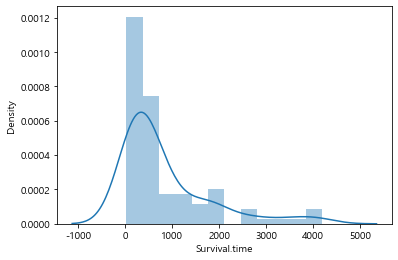

In [23]:
sns.distplot(clinical_info["Survival.time"], kde=True)

이렇게 보면 잘 모르겠으니 Survival.time이 몇년인지 새로 열을 만든다.

In [24]:
clinical_info["Survival.time(year)"] = clinical_info["Survival.time"] // 365
clinical_info.head(10)

,PatientID,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Overall.Stage,Histology,gender,Survival.time,deadstatus.event,Survival.time(year)
0,LUNG1-004,70,2,1,0,II,squamous cell carcinoma,male,141,dead,0
1,LUNG1-005,80,4,2,0,IIIb,squamous cell carcinoma,male,353,dead,0
2,LUNG1-006,73,3,1,0,IIIa,squamous cell carcinoma,male,173,dead,0
3,LUNG1-007,81,2,2,0,IIIa,squamous cell carcinoma,male,137,dead,0
4,LUNG1-008,71,2,2,0,IIIa,adenocarcinoma,male,77,dead,0
5,LUNG1-009,56,2,2,0,IIIa,squamous cell carcinoma,male,131,dead,0
6,LUNG1-011,64,4,0,0,IIIb,squamous cell carcinoma,male,515,dead,1
7,LUNG1-012,71,3,2,0,IIIa,squamous cell carcinoma,male,85,dead,0
8,LUNG1-014,66,4,0,0,IIIb,squamous cell carcinoma,male,1247,dead,3
9,LUNG1-018,82,2,1,0,II,squamous cell carcinoma,male,1926,dead,5


<AxesSubplot:xlabel='Survival.time(year)', ylabel='Density'>

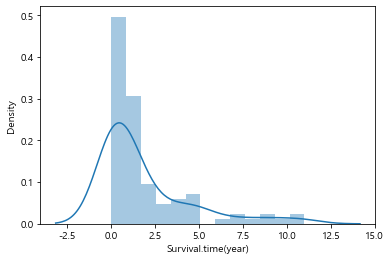

In [25]:
sns.distplot(clinical_info["Survival.time(year)"], kde=True)

Survival.time(year)의 분포를 보니 2년 내 생존이 데이터의 대부분을 차지하기 때문에 two-year survival을 예측하기로 한다.

#### deadstatus.event

In [26]:
clinical_info['deadstatus.event'].value_counts()

dead        93
survived     7
Name: deadstatus.event, dtype: int64

In [27]:
clinical_info['deadstatus.event'].value_counts(normalize=True).round(2)

dead        0.93
survived    0.07
Name: deadstatus.event, dtype: float64

<AxesSubplot:xlabel='deadstatus.event', ylabel='count'>

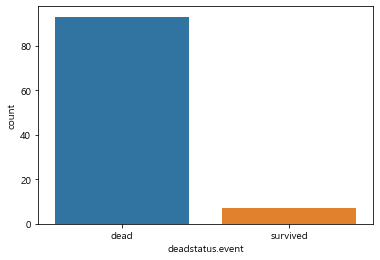

In [28]:
sns.countplot(x="deadstatus.event", data=clinical_info)

환자 사망 비율은 93%고 생존 비율은 7%로 사망 환자가 압도적으로 많다.

### two-year.survival

In [29]:
year = 365
# clinical_info[clinical_info["Survival.time"] <= 2*year]

In [30]:
# clinical_info[clinical_info["deadstatus.event"] == 'survived']

In [31]:
# clinical_info[(clinical_info["Survival.time"] <= 2*year) & (clinical_info["deadstatus.event"] == 'survived')]

In [32]:
# clinical_info[clinical_info["Survival.time"] <= 2*year]["deadstatus.event"].value_counts()

In [33]:
clinical_info["two-year.survival"] = np.where((clinical_info["Survival.time"] <= 2*year) & (clinical_info["deadstatus.event"] == 'dead'), "dead", "survived")
clinical_info[["Survival.time", "Survival.time(year)", "two-year.survival"]].head(10)

,Survival.time,Survival.time(year),two-year.survival
0,141,0,dead
1,353,0,dead
2,173,0,dead
3,137,0,dead
4,77,0,dead
5,131,0,dead
6,515,1,dead
7,85,0,dead
8,1247,3,survived
9,1926,5,survived


In [34]:
# clinical_info[clinical_info["two-year.survival"] == "survived"]

In [35]:
# clinical_info[clinical_info["two-year.survival"] == "dead"]

In [36]:
clinical_info.head(10)

,PatientID,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Overall.Stage,Histology,gender,Survival.time,deadstatus.event,Survival.time(year),two-year.survival
0,LUNG1-004,70,2,1,0,II,squamous cell carcinoma,male,141,dead,0,dead
1,LUNG1-005,80,4,2,0,IIIb,squamous cell carcinoma,male,353,dead,0,dead
2,LUNG1-006,73,3,1,0,IIIa,squamous cell carcinoma,male,173,dead,0,dead
3,LUNG1-007,81,2,2,0,IIIa,squamous cell carcinoma,male,137,dead,0,dead
4,LUNG1-008,71,2,2,0,IIIa,adenocarcinoma,male,77,dead,0,dead
5,LUNG1-009,56,2,2,0,IIIa,squamous cell carcinoma,male,131,dead,0,dead
6,LUNG1-011,64,4,0,0,IIIb,squamous cell carcinoma,male,515,dead,1,dead
7,LUNG1-012,71,3,2,0,IIIa,squamous cell carcinoma,male,85,dead,0,dead
8,LUNG1-014,66,4,0,0,IIIb,squamous cell carcinoma,male,1247,dead,3,survived
9,LUNG1-018,82,2,1,0,II,squamous cell carcinoma,male,1926,dead,5,survived


In [37]:
clinical_info["two-year.survival"].value_counts()

dead        68
survived    32
Name: two-year.survival, dtype: int64

In [38]:
clinical_info["two-year.survival"].value_counts(normalize=True).round(2)

dead        0.68
survived    0.32
Name: two-year.survival, dtype: float64

<AxesSubplot:xlabel='two-year.survival', ylabel='count'>

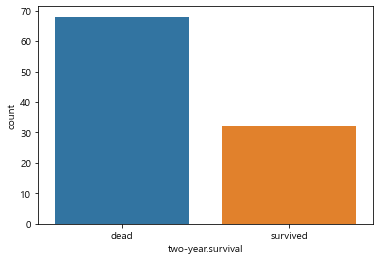

In [39]:
sns.countplot(x="two-year.survival", data=clinical_info)

2년 내 생존 유무(two-year survival)는 생존이 32%, 사망이 68%다.

In [40]:
clinical_info.drop(["Survival.time", "Survival.time(year)", "deadstatus.event"], axis=1, inplace=True)
clinical_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PatientID          100 non-null    object
 1   age                100 non-null    int32 
 2   clinical.T.Stage   100 non-null    object
 3   Clinical.N.Stage   100 non-null    object
 4   Clinical.M.Stage   100 non-null    object
 5   Overall.Stage      100 non-null    object
 6   Histology          100 non-null    object
 7   gender             100 non-null    object
 8   two-year.survival  100 non-null    object
dtypes: int32(1), object(8)
memory usage: 6.8+ KB


목표변수인 two-year.survival만 남기고 Survival.time, Survival.time(year), deadstatus.event는 분석에서 제외한다.

### 설명변수

In [41]:
# 히스토그램을 그리는 함수 - 수치형 변수

def fun_plot_hist(data, var):
    plt.hist(data[data["two-year.survival"] == "survived"][var], label="survived", alpha=0.5, color="blue")
    plt.hist(data[data["two-year.survival"] == "dead"][var], label="dead", alpha=0.5, color="red")
    plt.legend()

In [42]:
# 히스토그램과 커널밀도곡선을 그리는 함수 - 수치형 변수
# 커널밀도곡선은 히스토그램의 분포를 따라 그린 것이다.

def fun_plot_hist_kde(data, var):
    grp_col_dict = {'survived': 'blue', 'dead': 'red'}

    for group in grp_col_dict:
        subset = data[data['two-year.survival'] == group]
        sns.distplot(subset[var], 
                        hist = True, # histogram
                        kde = True,  # density curve
                        color = grp_col_dict[group],
                        label = group)
        
    plt.title('Histogram & Density Plot by Groups')
    plt.xlabel(str(var))
    plt.ylabel('Density')
    plt.legend(prop={'size': 12}, title = 'Group')
    plt.show()

In [43]:
# 막대그래프를 그리는 함수 - 범주형 변수

def fun_plot_bar(data, var):
    data_count_by_var_dead = data[data['two-year.survival'] == 'dead'].groupby(var).size()
    data_count_by_var_survived = data[data['two-year.survival'] == 'survived'].groupby(var).size()

    label = sorted(set(data[var]))
    N = len(label)
    index = np.arange(N)

    bar_width = 0.35
    alpha = 0.5

    p1 = plt.bar(index, data_count_by_var_dead, 
                 bar_width, 
                 color='b', 
                 alpha=alpha,
                 label='dead')

    p2 = plt.bar(index + bar_width, data_count_by_var_survived, 
                 bar_width, 
                 color='r', 
                 alpha=alpha,
                 label='survived')

    plt.ylabel('count')
    plt.xlabel(var)
    plt.xticks(index, label)
    plt.legend((p1[0], p2[0]), ('dead', 'survived'))
    plt.show()

In [44]:
# 크로스탭을 출력하는 함수 - 범주형 변수

def fun_print_crosstab(data, var):
    print(pd.crosstab(index = data['two-year.survival'], columns=data[var]))
    print()
    print(pd.crosstab(index = data['two-year.survival'], columns=data[var], normalize='columns').round(3))

#### age

In [45]:
clinical_info['age'].describe()

count    100.000000
mean      68.780000
std       10.003616
min       45.000000
25%       62.000000
50%       69.500000
75%       77.000000
max       87.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Density'>

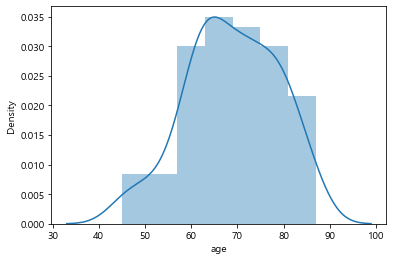

In [46]:
sns.distplot(clinical_info['age'], kde=True)

환자들의 평균 나이는 68세이고 최소 45세, 최대 87세이다. 그래프를 통해 대체로 60~87세에 분포함을 알 수 있다.

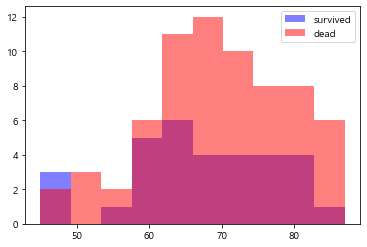

In [47]:
fun_plot_hist(clinical_info, "age")

나이(age)에 대해 2년 내 생존 환자 수와 사망 환자 수의 분포가 비슷하다.

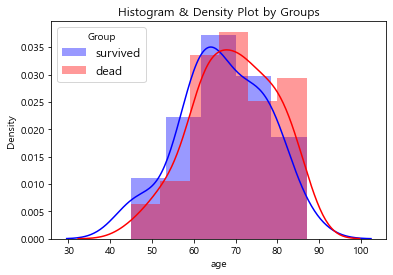

In [48]:
fun_plot_hist_kde(clinical_info, "age")

더 정확히 보기 위해 커널 밀도 곡선을 그려보았다. 2년 내 생존 환자의 분포와 사망 환자의 분포가 비슷함을 더욱 뚜렷하게 알 수 있다. 따라서 <U>age는 설명변수에서 제외하는 게 맞으나, 설명 변수 수가 얼마 없기 때문에 일단 제외하지 않는다.</U>

#### clinical.T.Stage

In [49]:
clinical_info['clinical.T.Stage'].value_counts().sort_index()

1    16
2    42
3    18
4    24
Name: clinical.T.Stage, dtype: int64

In [50]:
clinical_info['clinical.T.Stage'].value_counts(normalize=True).sort_index().round(2)

1    0.16
2    0.42
3    0.18
4    0.24
Name: clinical.T.Stage, dtype: float64

<AxesSubplot:xlabel='clinical.T.Stage', ylabel='count'>

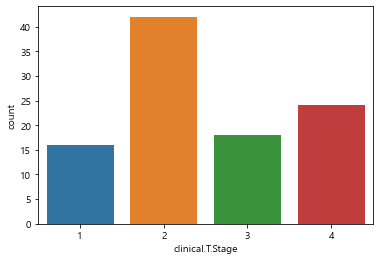

In [51]:
sns.countplot(x='clinical.T.Stage', data=clinical_info, order=clinical_info['clinical.T.Stage'].value_counts(normalize=True).sort_index().index)

T1은 16%, T2는 42%, T3은 18%, T4는 24%다. T2가 가장 많고 그 다음으로 T4가 많다.

In [52]:
fun_print_crosstab(clinical_info, 'clinical.T.Stage')

clinical.T.Stage    1   2   3   4
two-year.survival                
dead               10  32  13  13
survived            6  10   5  11

clinical.T.Stage       1      2      3      4
two-year.survival                            
dead               0.625  0.762  0.722  0.542
survived           0.375  0.238  0.278  0.458


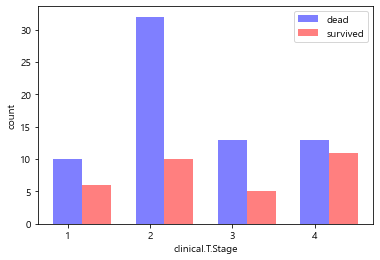

In [53]:
fun_plot_bar(clinical_info, 'clinical.T.Stage')

T1과 T3에서는 2년 내 사망 환자 수가 생존 환자 수에 2배가 되는데 반해 T2는 2년 내 사망환자 수가 생존 환자 수의 3배 가까이 된다. 이뿐만 아니라 T4는 생존 환자 수와 사망 환자 수가 유사하다. clinical.T.Stage의 단계에 따라 2년 내 생존여부에 영향을 끼치는 것으로 보이므로 <U>clinical.T.Stage를 설명변수에 포함</U>한다.

#### Clinical.N.Stage

In [54]:
clinical_info['Clinical.N.Stage'].value_counts().sort_index()

0    37
1     9
2    34
3    18
4     2
Name: Clinical.N.Stage, dtype: int64

N 병기 판정에는 4가 없으므로 모두 3으로 변경해준다.

In [55]:
clinical_info['Clinical.N.Stage'].replace('4', '3', inplace=True)
clinical_info['Clinical.N.Stage'].value_counts().sort_index()

0    37
1     9
2    34
3    20
Name: Clinical.N.Stage, dtype: int64

In [56]:
clinical_info['Clinical.N.Stage'].value_counts(normalize=True).sort_index().round(2)

0    0.37
1    0.09
2    0.34
3    0.20
Name: Clinical.N.Stage, dtype: float64

<AxesSubplot:xlabel='Clinical.N.Stage', ylabel='count'>

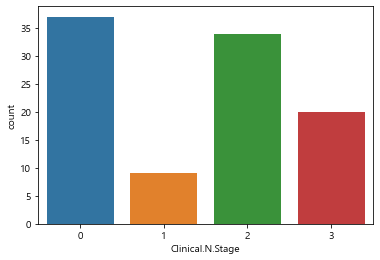

In [57]:
sns.countplot(x='Clinical.N.Stage', data=clinical_info, order=clinical_info['Clinical.N.Stage'].value_counts(normalize=True).sort_index().index)

N0은 37%, N1은 9%, N2는 34%, N3은 20%다. N0이 가장 많고 그 다음으로 N2가 많다. 이 둘이 전체 데이터의 71%를 차지한다.

In [58]:
fun_print_crosstab(clinical_info, 'Clinical.N.Stage')

Clinical.N.Stage    0  1   2   3
two-year.survival               
dead               24  6  25  13
survived           13  3   9   7

Clinical.N.Stage       0      1      2     3
two-year.survival                           
dead               0.649  0.667  0.735  0.65
survived           0.351  0.333  0.265  0.35


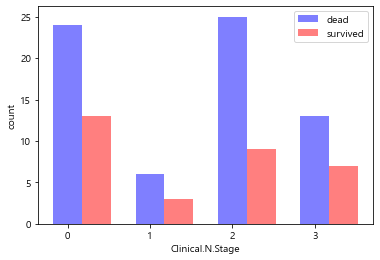

In [59]:
fun_plot_bar(clinical_info, 'Clinical.N.Stage')

N0, N1, N3는 2년 내 사망 환자 수가 생존 환자 수의 2배가 되는데 반해 N2는 2년 내 사망 환자 수가 생존 환자 수의 3배가 되는 점이 눈에 띈다. Clinical.N.Stage의 특정 단계가 2년 내 생존여부에 영향을 끼치는 것으로 보이므로 <U>Clinical.N.Stage를 설명변수에 포함</U>한다.

#### Clinical.M.Stage

In [60]:
clinical_info['Clinical.M.Stage'].value_counts().sort_index()

0    100
Name: Clinical.M.Stage, dtype: int64

In [61]:
clinical_info['Clinical.M.Stage'].value_counts(normalize=True).sort_index().round(2)

0    1.0
Name: Clinical.M.Stage, dtype: float64

모든 환자가 M0이므로 <U>Clinical.M.Stage는 설명변수에서 제외</U>한다.

In [62]:
clinical_info.drop('Clinical.M.Stage', axis=1, inplace=True)
clinical_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PatientID          100 non-null    object
 1   age                100 non-null    int32 
 2   clinical.T.Stage   100 non-null    object
 3   Clinical.N.Stage   100 non-null    object
 4   Overall.Stage      100 non-null    object
 5   Histology          100 non-null    object
 6   gender             100 non-null    object
 7   two-year.survival  100 non-null    object
dtypes: int32(1), object(7)
memory usage: 6.0+ KB


#### Overall.Stage

In [63]:
clinical_info['Overall.Stage'].value_counts().sort_index()

I       17
II      15
IIIa    30
IIIb    38
Name: Overall.Stage, dtype: int64

In [64]:
clinical_info['Overall.Stage'].value_counts(normalize=True).sort_index().round(2)

I       0.17
II      0.15
IIIa    0.30
IIIb    0.38
Name: Overall.Stage, dtype: float64

<AxesSubplot:xlabel='Overall.Stage', ylabel='count'>

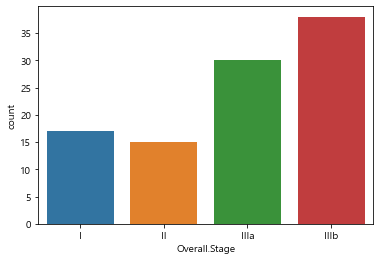

In [65]:
sns.countplot(x='Overall.Stage', data=clinical_info, order=clinical_info['Overall.Stage'].value_counts(normalize=True).sort_index().index)

병기는 l이 17%, II가 15%, IIIa가 30%, IIIb가 38%다.

In [66]:
fun_print_crosstab(clinical_info, 'Overall.Stage')

Overall.Stage       I  II  IIIa  IIIb
two-year.survival                    
dead               13  10    23    22
survived            4   5     7    16

Overall.Stage          I     II   IIIa   IIIb
two-year.survival                            
dead               0.765  0.667  0.767  0.579
survived           0.235  0.333  0.233  0.421


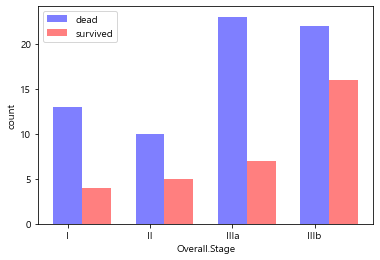

In [67]:
fun_plot_bar(clinical_info, 'Overall.Stage')

대체로 최종 병기가 높아질수록 사망환자 수가 증가함을 보인다. I와 IIIa의 경우 2년 내 사망 환자 수가 생존 환자 수의 3배이고, II는 2배인데 반해 IIIb는 2배가 채 되지 않는다. Overall.Stage의 특정 단계가 2년 내 생존여부에 영향을 끼치는 것으로 보이므로 <U>Overall.Stage를 설명변수에 포함</U>한다.

#### Histology

In [68]:
clinical_info.drop("Histology", axis=1, inplace=True)
clinical_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PatientID          100 non-null    object
 1   age                100 non-null    int32 
 2   clinical.T.Stage   100 non-null    object
 3   Clinical.N.Stage   100 non-null    object
 4   Overall.Stage      100 non-null    object
 5   gender             100 non-null    object
 6   two-year.survival  100 non-null    object
dtypes: int32(1), object(6)
memory usage: 5.2+ KB


Histology는 폐암의 종류이기 때문에 목표 변수를 예측할 수 없으므로 <U>Histology는 설명 변수에서 제외</U>한다.

#### gender

In [69]:
clinical_info['gender'].value_counts()

male      76
female    24
Name: gender, dtype: int64

In [70]:
clinical_info['gender'].value_counts(normalize=True).round(2)

male      0.76
female    0.24
Name: gender, dtype: float64

<AxesSubplot:xlabel='gender', ylabel='count'>

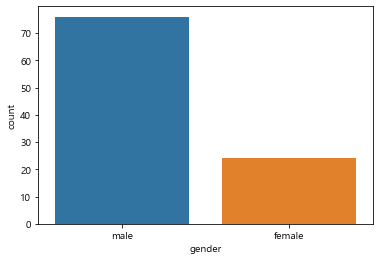

In [71]:
sns.countplot(x='gender', data=clinical_info)

남성 환자가 76%, 여성 환자가 24%로 남성 환자가 여성 환자의 3배 가까이 된다.

In [72]:
fun_print_crosstab(clinical_info, 'gender')

gender             female  male
two-year.survival              
dead                   14    54
survived               10    22

gender             female   male
two-year.survival               
dead                0.583  0.711
survived            0.417  0.289


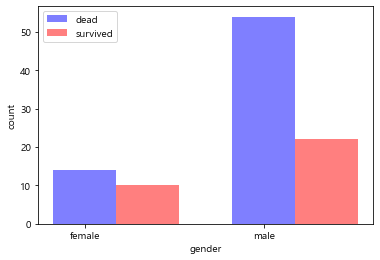

In [73]:
fun_plot_bar(clinical_info, 'gender')

남성의 경우 2년 내 사망 환자 수가 생존 환자 수의 2배가 넘는다. 반면에 여성은 뚜렷하게 차이가 나지 않는다. 특정 성별이 2년 내 생존 여부에 크게 영향을 미치는 것으로 보이므로 <U>gender를 설명변수에 포함한다.</U>

## 3. 변수들의 결측 및 이상치 처리

In [74]:
clinical_info.isnull().sum()

PatientID            0
age                  0
clinical.T.Stage     0
Clinical.N.Stage     0
Overall.Stage        0
gender               0
two-year.survival    0
dtype: int64

결측치는 없다.

<AxesSubplot:>

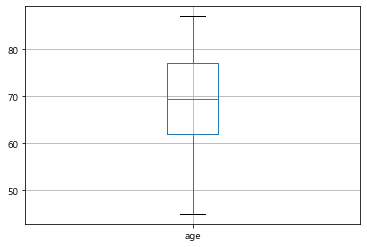

In [75]:
clinical_info.boxplot()

In [76]:
def countOutliers(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    
    iqr = 1.5 * (q3 - q1)

    lenOutliers = len(x[column][(x[column] > (q3 + iqr)) | (x[column] < (q1 - iqr))])
    
    return lenOutliers

In [77]:
countOutliers(clinical_info, 'age')

0

이상치도 없다.

In [78]:
clinical_info.to_csv("clinical_info.csv", index=False)

최종 데이터를 clinical_info.csv로 저장했다.